# Analysis of the optimization results

We can analyse the data stored in ``optimization_results.csv`` and ``gp_model.pkl`` to find the similarities and differences between optimization methods, as well as check their performances in terms of metric improvements, exploration and exploitation of the hyperparameter space, rate of convergence, improvement trends, etc.

In this example we have performed the optimization of the MST-NectarCam telescope using three different optimization algorithms: random search, tree parzen estimators and gaussian processes. This way, we have obtained from CTLearn Optimizer three optimization_results files, that have been renamed to ``mstn_random.csv``, ``mstn_tpe.csv`` and ``mstn_gp.csv``; and one ``gp_model.pkl`` file. The main configuration of the optimization runs is show below:

- Metric optimized: auc

- Number of random evaluations: 20

- Model optimized: single_tel

- Iterations performed: 100 
 
- Space of hyperparameters to optimize: 
    - layer1_filters: [16, 64] 
    - layer2_filters: [16, 128]
    - layer3_filters: [16, 256]
    - layer4_filters: [16, 512]
    - layer1_kernel: [2,10] 
    - layer2_kernel: [2,10] 
    - layer3_kernel: [2,10] 
    - layer4_kernel: [2,10].




## Data loading and preprocessing

On this section we are going to import the required packages and load and preprocess the data for further analysis.

In [3]:
# import the required packages
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skopt.plots import plot_evaluations, plot_objective
from ctlearn_optimizer.auxiliar_functions import df2result, plot_convergence


# load the optimization_results files as dataframes
mstn_random = pd.read_csv('mstn_random.csv')
mstn_tpe = pd.read_csv('mstn_tpe.csv')
mstn_gp = pd.read_csv('mstn_gp.csv')

# load the gp_model
gp_model = pickle.load(open('gp_model.pkl', 'rb'))


# prepare the data for plotting by converting dataframes to scipy.optimize.OptimizeResult format
# metric_col (str) – Name of the metric to optimize column
# param_cols (list) – Names of the hyperparameter columns

mstn_random_result = df2result(mstn_random, 
                       metric_col = 'auc_val', 
                       param_cols = ['layer1_filters', 'layer1_kernel', 'layer2_filters', 'layer2_kernel',
                                    'layer3_filters', 'layer3_kernel', 'layer4_filters', 'layer4_kernel'])

mstn_tpe_result = df2result(mstn_tpe, 
                       metric_col = 'auc_val', 
                       param_cols = ['layer1_filters', 'layer1_kernel', 'layer2_filters', 'layer2_kernel',
                                    'layer3_filters', 'layer3_kernel', 'layer4_filters', 'layer4_kernel'])
mstn_gp_result = df2result(mstn_gp, 
                       metric_col = 'auc_val', 
                       param_cols = ['layer1_filters', 'layer1_kernel', 'layer2_filters', 'layer2_kernel',
                                    'layer3_filters', 'layer3_kernel', 'layer4_filters', 'layer4_kernel'])


## Fast review of the results

We can print the first rows of the dataframes sorted by the metric values in order to check the 
best results obtained by CTLearn Optimizer





In [4]:
# show all the columns
pd.set_option('display.max_columns', None)

In [5]:
# random search
mstn_random_sorted = mstn_random.sort_values('auc_val', ascending = False)
mstn_random_sorted.head(5)

,loss,iteration,layer1_filters,layer2_filters,layer3_filters,layer4_filters,layer1_kernel,layer2_kernel,layer3_kernel,layer4_kernel,auc_val,acc_val,acc_gamma_val,acc_proton_val,loss_val,run_time
15,0.107249,16,43.0,121.0,249.0,494.0,5.0,6.0,6.0,9.0,0.892751,0.803882,0.813764,0.794211,0.817045,4713.880727
65,0.109556,66,46.0,111.0,130.0,328.0,7.0,3.0,10.0,9.0,0.890444,0.798864,0.769322,0.827776,0.833634,3441.692499
19,0.109655,20,61.0,87.0,233.0,459.0,5.0,9.0,5.0,5.0,0.890345,0.801940,0.804662,0.799276,0.827184,3829.715509
20,0.110015,21,35.0,72.0,166.0,436.0,7.0,7.0,10.0,5.0,0.889985,0.801536,0.815217,0.788147,0.827923,3150.214954
70,0.110091,71,54.0,116.0,136.0,342.0,7.0,9.0,4.0,8.0,0.889909,0.800413,0.859001,0.743075,0.831390,4065.117532


In [6]:
# tree parzen estimators
mstn_tpe_sorted = mstn_tpe.sort_values('auc_val', ascending = False)
mstn_tpe_sorted.head(5)

,iteration,loss,layer1_filters,layer1_kernel,layer2_filters,layer2_kernel,layer3_filters,layer3_kernel,layer4_filters,layer4_kernel,auc_val,acc_val,acc_gamma_val,acc_proton_val,loss_val,run_time
83,84,0.107111,58.0,5.0,109.0,8.0,183.0,8.0,315.0,4.0,0.892889,0.801051,0.858612,0.747094,0.821363,3167.990778
82,83,0.107507,59.0,6.0,124.0,7.0,189.0,10.0,207.0,4.0,0.892493,0.797940,0.868293,0.731991,0.827550,3159.622981
71,72,0.107807,62.0,6.0,94.0,6.0,204.0,10.0,130.0,4.0,0.892193,0.802589,0.827305,0.779421,0.819639,3043.263056
63,64,0.108042,49.0,5.0,109.0,5.0,204.0,6.0,414.0,4.0,0.891958,0.802729,0.824535,0.782288,0.819942,6947.555477
33,34,0.108045,44.0,10.0,120.0,6.0,194.0,10.0,133.0,10.0,0.891955,0.802461,0.792506,0.811793,0.825479,5820.490232


In [7]:
# gaussian processes
mstn_gp_sorted = mstn_gp.sort_values('auc_val', ascending = False)
mstn_gp_sorted.head(5)

,loss,iteration,layer1_filters,layer2_filters,layer3_filters,layer4_filters,layer1_kernel,layer2_kernel,layer3_kernel,layer4_kernel,auc_val,acc_val,acc_gamma_val,acc_proton_val,loss_val,run_time
92,0.107388,93,64.0,128.0,256.0,239.0,10.0,5.0,10.0,10.0,0.892612,0.800930,0.777606,0.823755,0.825392,3585.451714
49,0.108346,50,30.0,122.0,253.0,292.0,6.0,6.0,7.0,10.0,0.891654,0.802131,0.800667,0.803563,0.820788,3474.704604
84,0.108458,85,64.0,128.0,256.0,512.0,2.0,6.0,10.0,8.0,0.891542,0.802950,0.844383,0.762401,0.822343,4077.138633
93,0.108585,94,64.0,128.0,256.0,512.0,10.0,6.0,10.0,8.0,0.891415,0.802636,0.828790,0.777040,0.819367,4140.540171
20,0.108707,21,64.0,128.0,256.0,512.0,10.0,10.0,10.0,10.0,0.891293,0.800099,0.774065,0.825577,0.831538,4840.163612


## Visualization utilities

The following plots are useful to compare the behaviour of the optimization algorithms 

### Plot metric values versus iteration

In the graphic below we can see that the trend of the metric values obtained by the algorithms is positive in the tree parzen estimators and gaussian processes cases, while it is negative for the random search algorithm. This could be because the first two algorithms are taking advantage of an improved surrogate that gets closer to the actual objective function as the optimization process moves on; while the third method is randomly sampling the search space.

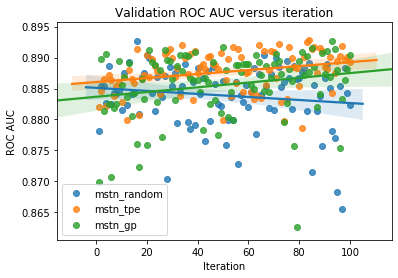

In [18]:
sns.regplot(mstn_random['iteration'], mstn_random['auc_val'], label = 'mstn_random')
sns.regplot(mstn_tpe['iteration'], mstn_tpe['auc_val'], label = 'mstn_tpe')
sns.regplot(mstn_gp['iteration'], mstn_gp['auc_val'], label = 'mstn_gp')

plt.xlabel('Iteration');
plt.ylabel('ROC AUC' ); 
plt.title('Validation ROC AUC versus iteration'), plt.legend(loc="best");

### Plot convergence

It is interesting to visualize the progress of the optimization algorithms by showing the best to date result at each iteration, this way we can know which algorithm is the best in terms of rate of convergence.



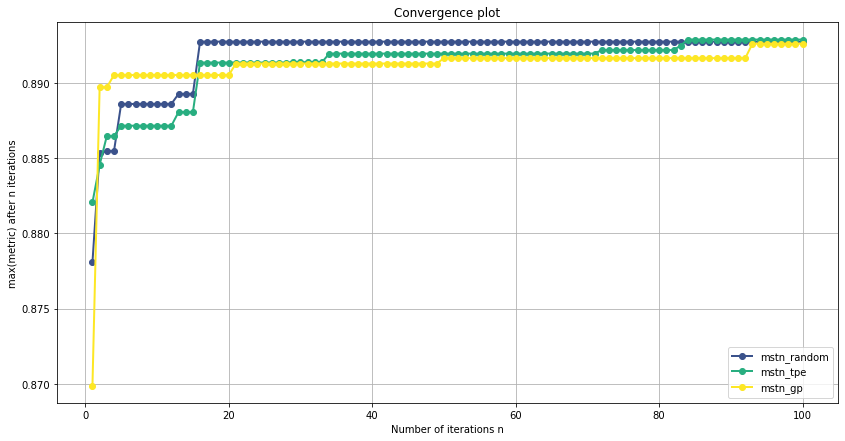

In [8]:
# results = list of (name, results) tuples
results = [('mstn_random', mstn_random_result), ('mstn_tpe', mstn_tpe_result),('mstn_gp', mstn_gp_result)]
plt.figure(figsize=(14,7))
plot_convergence(*results)
plt.show()

### Plot search evolution

By using this plot we can see the evolution of the search performed by the optimization algorithm, we see the histograms of explored values and, for each pair of hyperparameters, the scatter plot of sampled values is plotted with the evolution represented by color, from blue to yellow.

In the graphics below we can see that each optimization method converge to certain parts of space that are considered more promising by the algorithm and, therefore, are explored further. These regions are different for each algorithm.


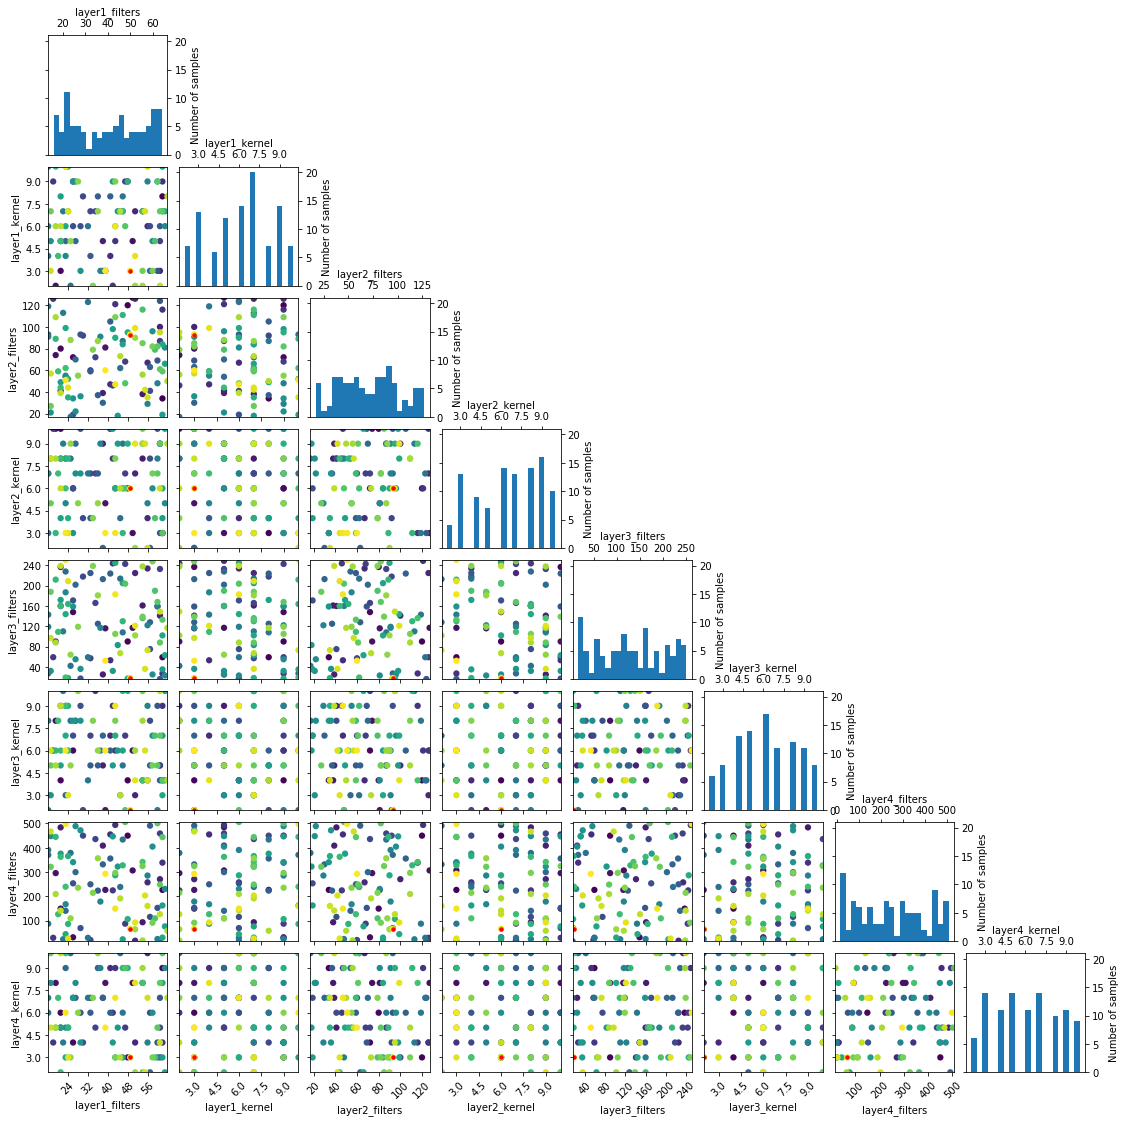

In [27]:
# random search
plot_evaluations(mstn_random_result)
plt.show()

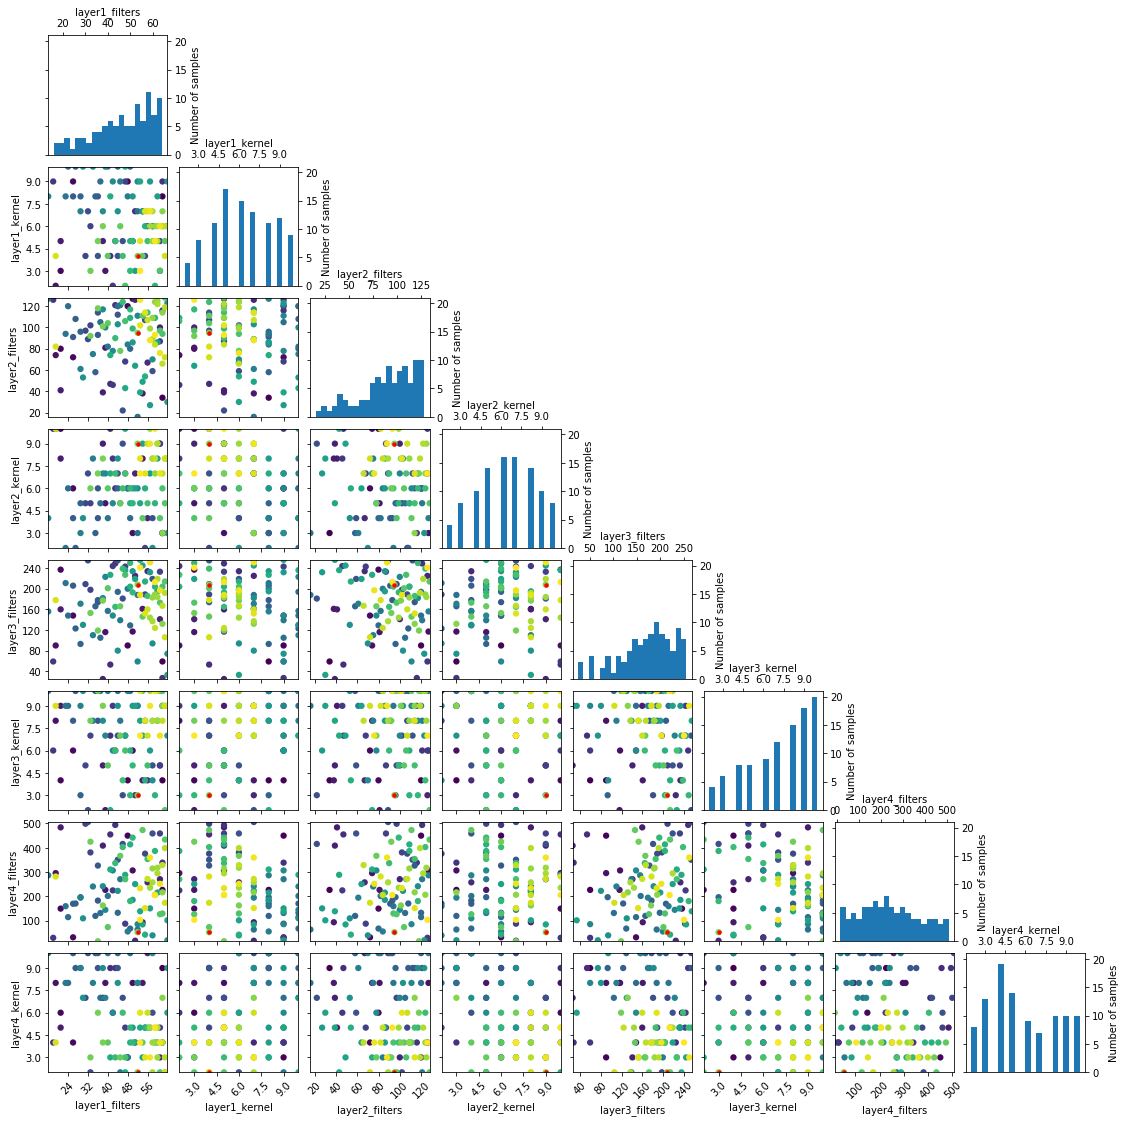

In [28]:
# tree parzen estimators
plot_evaluations(mstn_tpe_result)
plt.show()

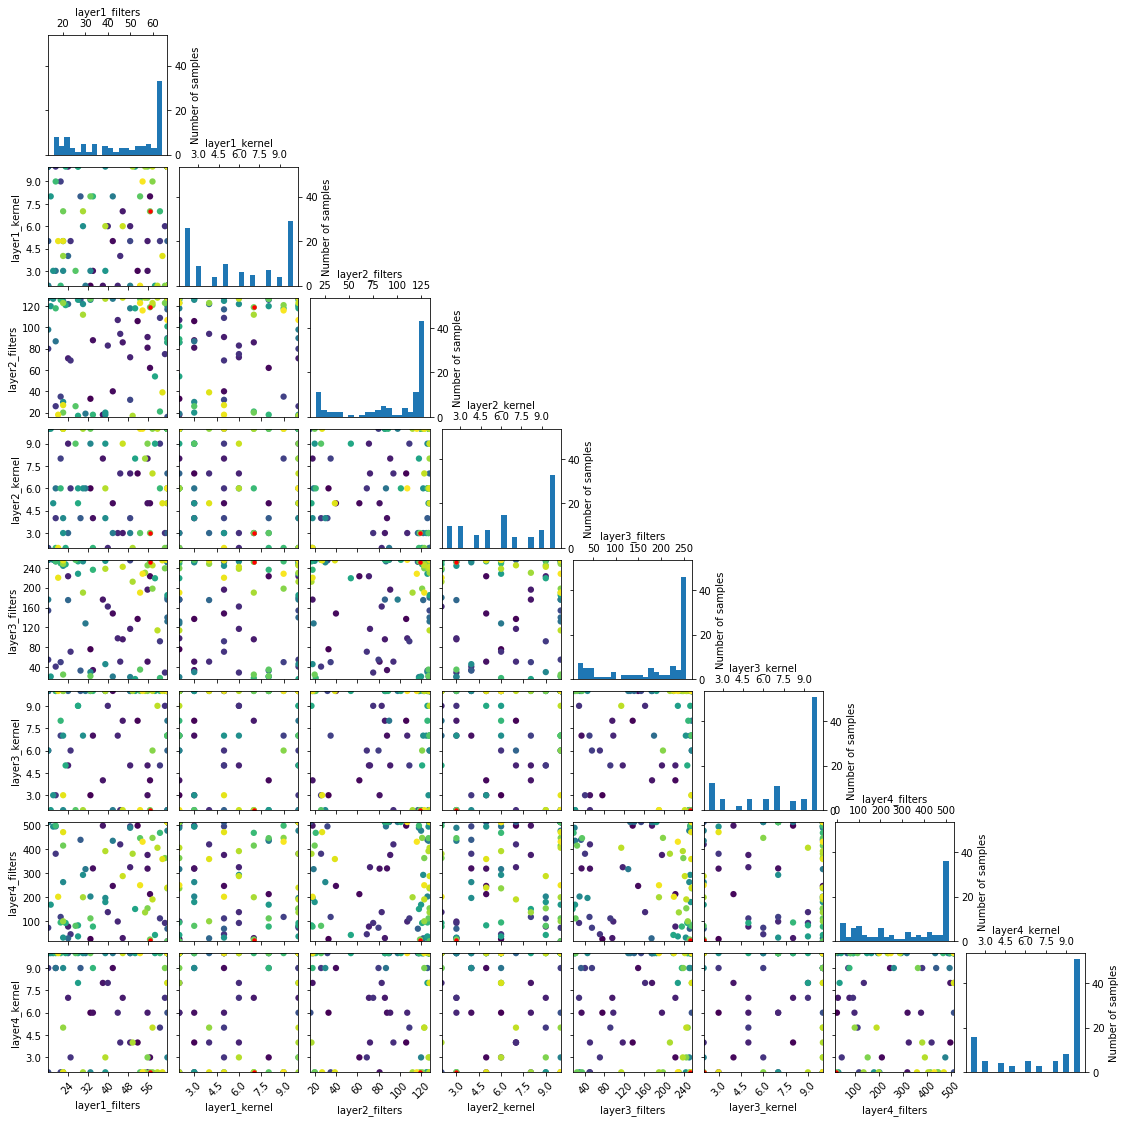

In [29]:
# gaussian processes 
plot_evaluations(mstn_gp_result)
plt.show()

### Plot objective

The gaussian processes algorithm allows to plot the pairwise partial dependece of the objective function for each dimension of the space of hyperparameters.

By making these graphs we can gain intuition into the objective function sensitivity with respect to hyperparameters. This way we can decide which parts of the space may require more fine-grained search and which hyperparameters barely affect the score and can potentially be dropped from the search. 

For example, in the graphic below we can see from the charts that the changes in the kernel size of the first layer  don't affect the metric score.


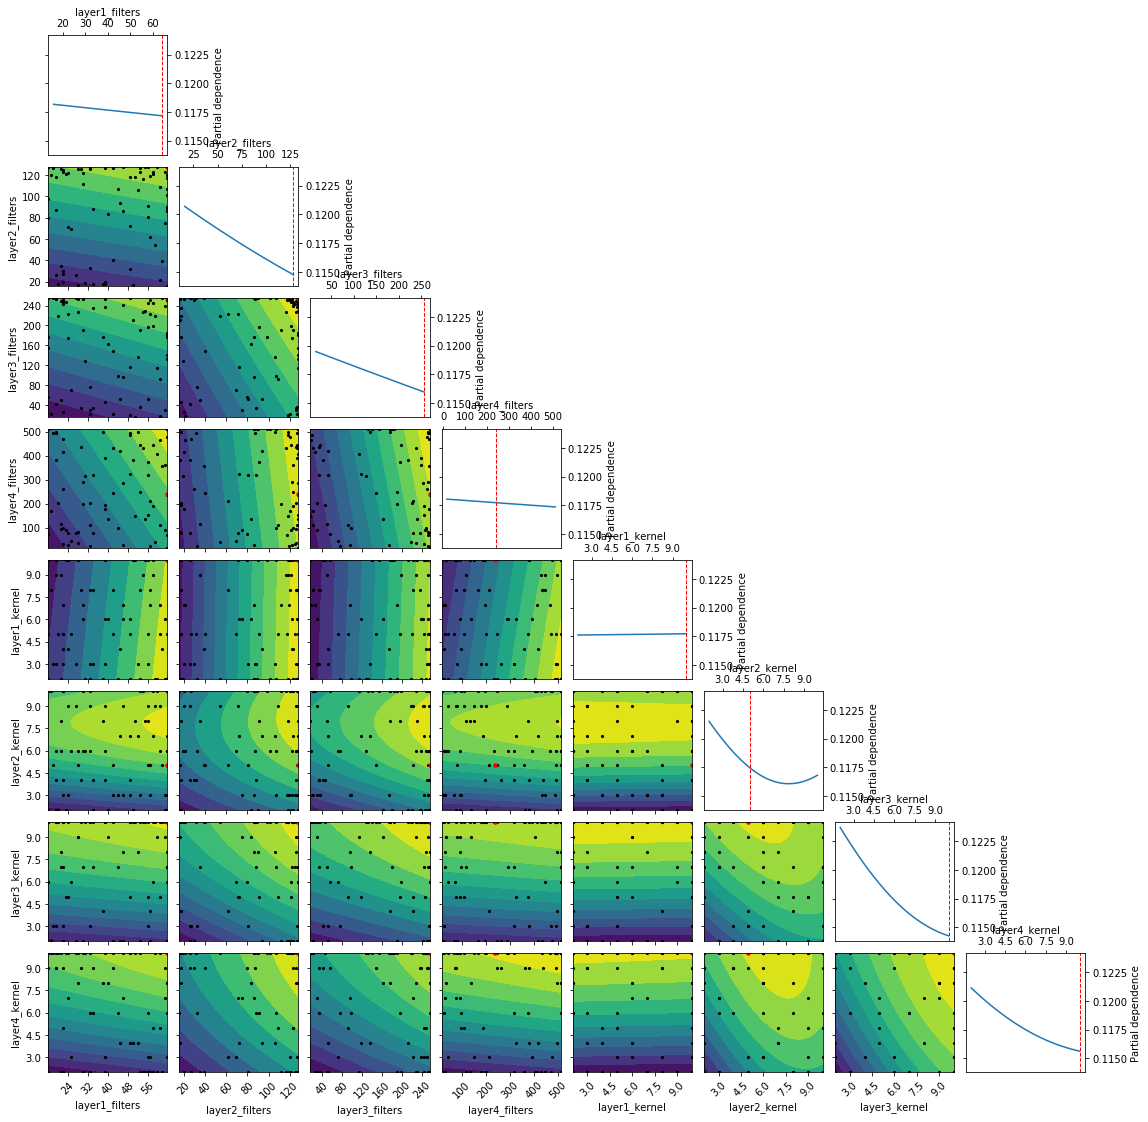

In [11]:
# dimensions = list of hyperparameter names
plot_objective(gp_model, dimensions = ['layer1_filters', 'layer2_filters', 'layer3_filters', 'layer4_filters', 
                                       'layer1_kernel','layer2_kernel','layer3_kernel','layer4_kernel'])
plt.show()